Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

Load dataset

In [2]:
df = pd.read_csv("./ACI-IoT-2023.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.describe(include='all')

C:\Users\inima\AppData\Roaming\Python\Python313\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\inima\AppData\Roaming\Python\Python313\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Connection Type
count,1231411,1231411,1.231411e+06,1231411,1.231411e+06,1.231411e+06,1231411,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.230402e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1231411.0,1.231411e+06,1231411.0,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1231411.0,1231411.0,1231411.0,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1231411.0,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1.231411e+06,1231411,1231411
unique,865406,159381,NaN,89089,NaN,NaN,75403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2
top,8.6.0.1-8.0.6.4-0-0-0,192.168.1.45,NaN,192.168.1.1,NaN,NaN,2023-10-30 12:21:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Port Scan,wireless
freq,3685,621729,NaN,255771,NaN,NaN,16208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441282,742758
mean,NaN,NaN,3.680030e+04,NaN,1.540297e+04,6.433792e+00,NaN,5.236489e+06,5.456022e+00,5.439780e+00,4.998453e+03,2.078230e+04,1.060881e+02,1.164441e+01,3.245995e+01,3.525900e+01,1.514058e+02,1.412901e+01,4.599782e+01,4.432950e+01,inf,inf,2.566652e+06,6.524624e+05,3.608930e+06,2.173028e+06,5.162231e+06,2.980284e+06,3.911888e+05,3.566219e+06,2.735757e+06,2.179595e+06,8.974230e+05,1.619241e+05,1.175485e+06,7.880951e+05,5.276873e-02,0.0,3.069649e-04,0.0,1.462479e+02,1.524636e+02,2.172460e+0

Rows and columns

In [4]:
df.shape

(1231411, 85)

Features

In [5]:
df.drop(["Flow Bytes/s","Timestamp","Flow Packets/s"],axis=1,inplace=True)
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Connection Type
0,192.168.1.7-54.230.163.60-33344-443-6,192.168.1.7,33344,54.230.163.60,443,6,379933,11,11,720.0,6169.0,517.0,0.0,65.454545,154.291519,2736.0,0.0,560.818182,904.459708,1.809205e+04,7.425997e+04,341860.0,1.0,376237.0,37623.7,106991.427191,341860.0,1.0,375202.0,37520.2,108963.958111,347222.0,204.0,0,0,0,0,360,360,28.952473,28.952473,0.0,2736.0,299.521739,669.529745,448270.079051,1,2,0,8,21,0,0,0,1.0,313.136364,65.454545,560.818182,0,0,0,6889,9,233993,0,32,0,280,29200,131,4,32,0.0,0.0,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1.698846e+15,Benign,wired
1,192.168.3.6-91.189.91.48-36754-80-6,192.168.3.6,36754,91.189.91.48,80,6,205637,3,3,87.0,189.0,87.0,0.0,29.000000,50.229473,189.0,0.0,63.000000,109.119201,4.112740e+04,7.851916e+04,181122.0,0.0,190862.0,95431.0,134959.814471,190862.0,0.0,195897.0,97948.5,138520.097114,195897.0,0.0,0,0,0,0,104,104,14.588814,14.588814,0.0,189.0,39.428571,73.493440,5401.285714,1,2,0,2,5,0,0,0,1.0,46.000000,29.000000,63.000000,0,0,0,0,0,0,0,14,0,31,29200,508,1,32,0.0,0.0,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1.698846e+15,Benign,wired
2,192.168.3.6-91.189.91.48-36754-80-6,192.168.3.6,36754,91.189.91.48,80,6,0,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,64,0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1,0,0,0,2,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,237,0,0,32,0.0,0.0,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1.698846e+15,Benign,wired
3,192.168.1.9-192.168.1.1-8080-40426-6,192.168.1.9,8080,192.168.1.1,40426,6,5030379,1,2,6.0,0.0,6.0,6.0,6.000000,0.000000,0.0,0.0,0.000000,0.000000,2.515190e+06,3.557015e+06,5030379.0,0.0,0.0,0.0,0.000000,0.0,0.0,5030379.0,5030379.0,0.000000,5030379.0,5030379.0,0,0,0,0,20,64,0.198792,0.397584,0.0,6.0,3.000000,3.464102,12.000000,1,0,0,0,3,0,0,0,2.0,4.000000,6.000000,0.000000,0,0,0,0,0,0,0,2,0,0,2048,123,0,20,0.0,0.0,0.0,0.0,8.494231e+14,1.201266e+15,1.698846e+15,5.030379e+06,Benign,wired
4,192.168.1.20-35.232.111.17-40054-80-6,192.168.1.20,40054,35.232.111.17,80,6,72278,3,4,87.0,148.0,87.0,0.0,29.000000,50.229473,148.0,0.0,37.000000,74.000000,1.204633e+04,1.672774e+04,35120.0,205.0,35109.0,17554.5,21349.675044,32651.0,2458.0,40239.0,13413.0,21473.154798,38190.0,205.0,0,0,0,0,104,136,41.506406,55.341874,0.0,148.0,29.375000,56.782637,3224.267857,1,2,0,2,6,0,0,0,1.0,33.571429,29.000000,37.000000,0,0,0,0,0,0,0,12,0,21,29200,508,1,32,0.0,0.0,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1.698846e+15,Benign,wired


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231411 entries, 0 to 1231410
Data columns (total 82 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Flow ID                     1231411 non-null  object 
 1   Src IP                      1231411 non-null  object 
 2   Src Port                    1231411 non-null  int64  
 3   Dst IP                      1231411 non-null  object 
 4   Dst Port                    1231411 non-null  int64  
 5   Protocol                    1231411 non-null  int64  
 6   Flow Duration               1231411 non-null  int64  
 7   Total Fwd Packet            1231411 non-null  int64  
 8   Total Bwd packets           1231411 non-null  int64  
 9   Total Length of Fwd Packet  1231411 non-null  float64
 10  Total Length of Bwd Packet  1231411 non-null  float64
 11  Fwd Packet Length Max       1231411 non-null  float64
 12  Fwd Packet Length Min       1231411 non-null  float64
 1

Data vizualization

In [7]:
label_counts =df.Label.value_counts()
print(label_counts)

Label
Port Scan             441282
Benign                329295
ICMP Flood            225234
Ping Sweep             71928
DNS Flood              46935
Vulnerability Scan     39537
OS Scan                37524
Slowloris              18643
SYN Flood              13857
Dictionary Attack       6380
UDP Flood                791
ARP Spoofing               5
Name: count, dtype: int64


C:\Users\inima\AppData\Local\Temp\ipykernel_32096\410783657.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=filtered_label_counts.index, y=filtered_label_counts.values, palette="Blues")


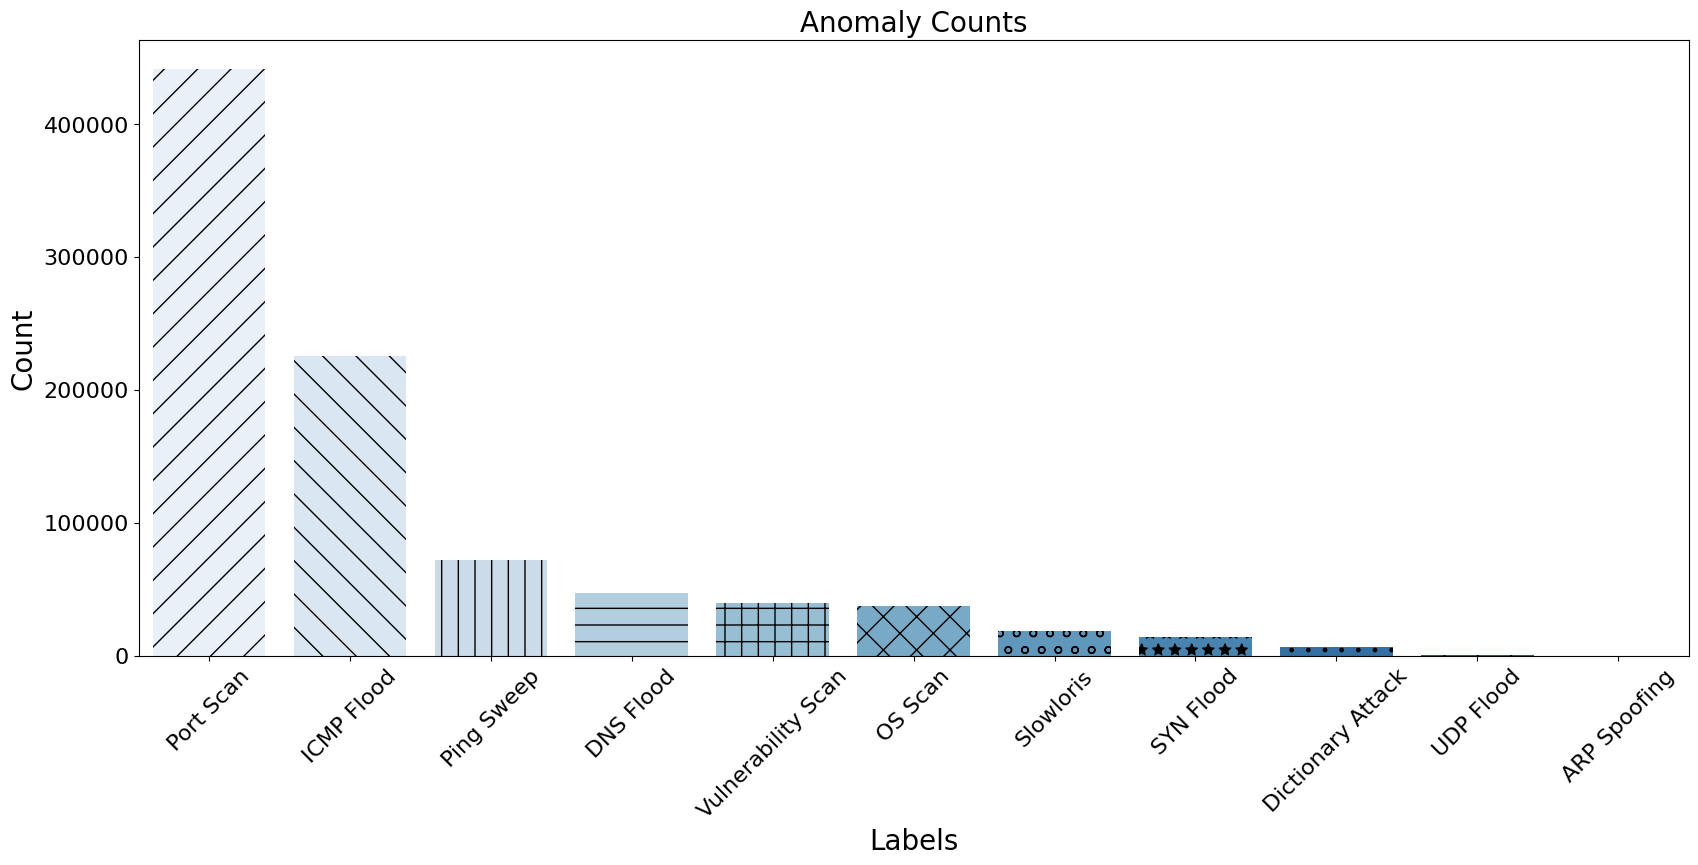

In [8]:
filtered_label_counts = label_counts[label_counts.index != 'Benign']

hatch_patterns = ['/', '\\', '|', '-', '+', 'x', 'o', '*', '.']

plt.figure(figsize=(20, 8))
ax = sns.barplot(x=filtered_label_counts.index, y=filtered_label_counts.values, palette="Blues")

for i, bar in enumerate(ax.patches):
    bar.set_hatch(hatch_patterns[i % len(hatch_patterns)])

plt.title('Anomaly Counts', fontsize=20)
plt.xlabel('Labels', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

plt.show()

In [9]:
df.Label.value_counts()

Label
Port Scan             441282
Benign                329295
ICMP Flood            225234
Ping Sweep             71928
DNS Flood              46935
Vulnerability Scan     39537
OS Scan                37524
Slowloris              18643
SYN Flood              13857
Dictionary Attack       6380
UDP Flood                791
ARP Spoofing               5
Name: count, dtype: int64

Categorical data to numerical data

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


In [11]:
df.Label.value_counts()

Label
7     441282
1     329295
4     225234
6      71928
2      46935
11     39537
5      37524
9      18643
8      13857
3       6380
10       791
0          5
Name: count, dtype: int64

Splitting training and test data

In [12]:
X=df.drop(columns=['Label','Flow ID','Src IP','Dst IP','Connection Type'])
Y=df['Label'].values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(985128, 77) (985128,)
(246283, 77) (246283,)


C:\Users\inima\AppData\Local\Temp\ipykernel_32096\170990328.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=df_plot, palette="Blues")


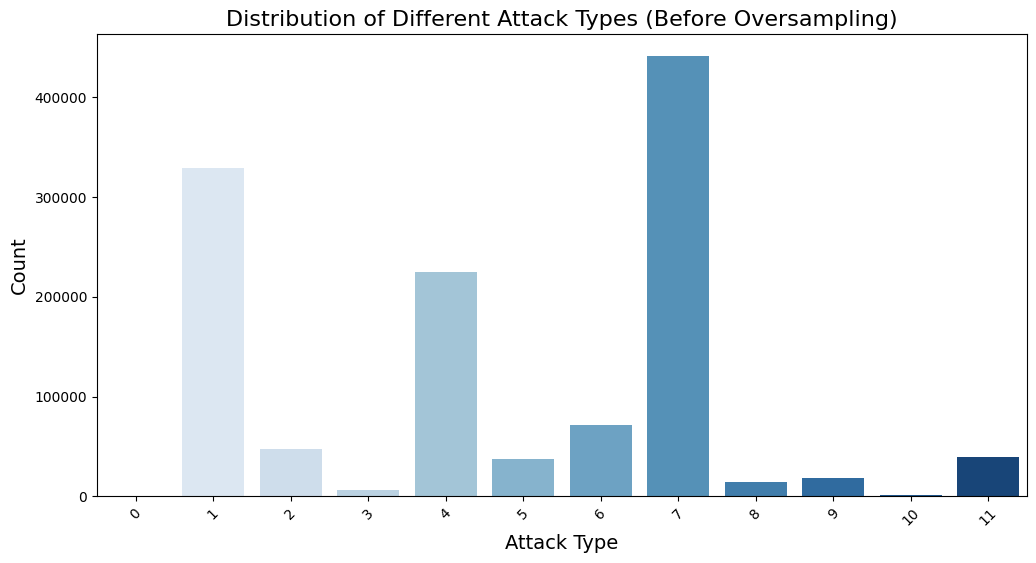

In [15]:
# Count occurrences of each category in the dataset
category_counts = df['Label'].value_counts().sort_index()  # Sort by label index (0-11)

# Convert to DataFrame for plotting
df_plot = pd.DataFrame({'Category': category_counts.index, 'Count': category_counts.values})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Count', data=df_plot, palette="Blues")

plt.xlabel('Attack Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Different Attack Types (Before Oversampling)', fontsize=16)
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.show()


Oversampling and undersampling for balanced training data

In [16]:
import pandas as pd

# Get class distribution
class_counts = df['Label'].value_counts()
total_samples = 1000000  # Adjust this based on desired dataset size

# Define proportions
benign_ratio = 0.3  # Benign should be 30% of total
attack_ratio = 1 - benign_ratio  # Remaining percentage for attack types

benign_target = int(total_samples * benign_ratio)
attack_target_total = total_samples - benign_target

# Scale attack types proportionally
attack_proportions = class_counts[class_counts.index != 0] / class_counts[class_counts.index != 0].sum()
attack_targets = (attack_proportions * attack_target_total).astype(int)

print("Before Oversampling:")
print(class_counts)

# List to hold oversampled data
oversampled_data = [df]

# Oversample Benign
benign_samples = df[df['Label'] == 0]
num_to_add_benign = benign_target - len(benign_samples)

if num_to_add_benign > 0:
    print(f"Oversampling Benign: Adding {num_to_add_benign} samples")
    synthetic_benign = benign_samples.sample(n=num_to_add_benign, replace=True, random_state=42)
    oversampled_data.append(synthetic_benign)

# Oversample each attack class based on calculated proportions
for label, target_count in attack_targets.items():
    current_count = class_counts[label]
    num_to_add = target_count - current_count
    if num_to_add > 0:
        print(f"Oversampling class {label}: Adding {num_to_add} samples")
        samples = df[df['Label'] == label].sample(n=num_to_add, replace=True, random_state=42)
        oversampled_data.append(samples)

# Merge all oversampled data
df_balanced = pd.concat(oversampled_data, ignore_index=True)

print("\nAfter Oversampling:")
print(df_balanced['Label'].value_counts())


Before Oversampling:
Label
7     441282
1     329295
4     225234
6      71928
2      46935
11     39537
5      37524
9      18643
8      13857
3       6380
10       791
0          5
Name: count, dtype: int64
Oversampling Benign: Adding 299995 samples

After Oversampling:
Label
7     441282
1     329295
0     300000
4     225234
6      71928
2      46935
11     39537
5      37524
9      18643
8      13857
3       6380
10       791
Name: count, dtype: int64


C:\Users\inima\AppData\Local\Temp\ipykernel_32096\3987150343.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=df_plot, palette="Blues")


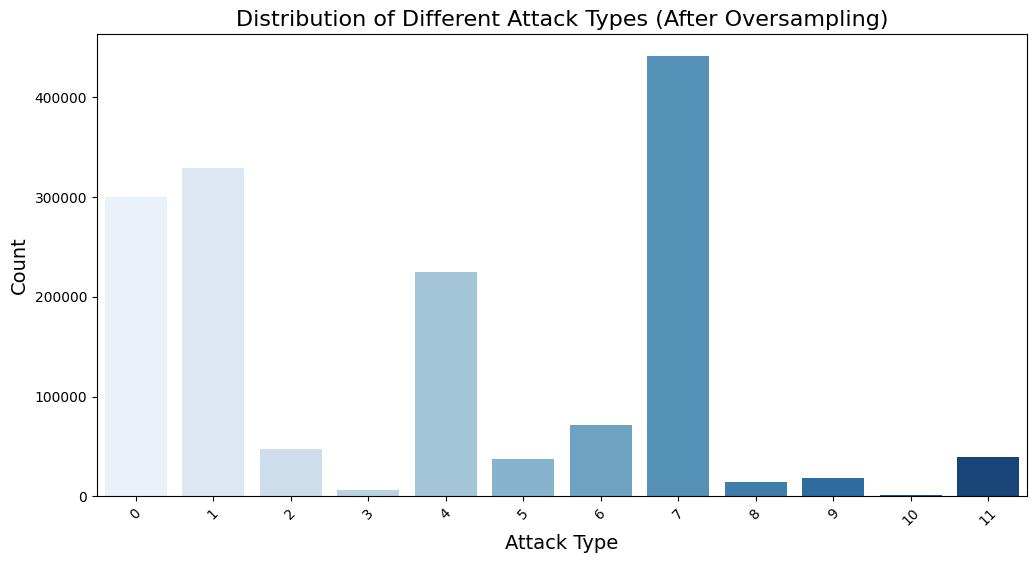

In [17]:
category_counts = df_balanced['Label'].value_counts().sort_index()

# Convert to DataFrame for plotting
df_plot = pd.DataFrame({'Category': category_counts.index, 'Count': category_counts.values})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Count', data=df_plot, palette="Blues")

# Labels & Title
plt.xlabel('Attack Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Different Attack Types (After Oversampling)', fontsize=16)
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.show()


In [18]:
X=df_balanced.drop(columns=['Label','Flow ID','Src IP','Dst IP','Connection Type'])
Y=df_balanced['Label'].values

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1225124, 77) (1225124,)
(306282, 77) (306282,)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.42


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     59984
           1       0.94      0.13      0.22     66070
           2       0.00      0.00      0.00      9177
           3       0.00      0.00      0.00      1304
           4       0.77      0.70      0.73     44893
           5       0.00      0.00      0.00      7544
           6       0.00      0.00      0.00     14549
           7       0.34      1.00      0.51     88229
           8       0.00      0.00      0.00      2808
           9       0.00      0.00      0.00      3668
          10       0.00      0.00      0.00       147
          11       0.00      0.00      0.00      7909

    accuracy                           0.42    306282
   macro avg       0.17      0.15      0.12    306282
weighted avg       0.41      0.42      0.30    306282





/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


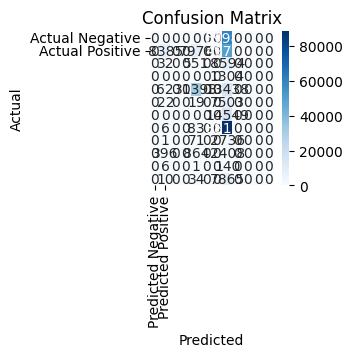

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import  classification_report
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy:.2f}")
print('\n')
# Print classification report (precision, recall, f1-score, etc.)
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print('\n')
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
X=df.drop(columns=['Label','Flow ID','Src IP','Dst IP','Connection Type'])
Y=df['Label'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestClassifier(    n_estimators=100,  # Reduce trees
    max_depth=10,  # Limit depth
    min_samples_split=10,  # Require more samples per split
    min_samples_leaf=5,  # Prevent small leaf nodes
    class_weight="balanced",  # Handle imbalance
    random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98     65782
           2       1.00      1.00      1.00      9353
           3       0.87      1.00      0.93      1331
           4       1.00      1.00      1.00     44926
           5       1.00      1.00      1.00      7687
           6       0.95      1.00      0.97     14545
           7       1.00      0.99      0.99     88190
           8       1.00      1.00      1.00      2832
           9       0.98      1.00      0.99      3725
          10       0.51      0.99      0.67       141
          11       0.98      1.00      0.99      7771

    accuracy                           0.99    246283
   macro avg       0.93      1.00      0.96    246283
weighted avg       0.99      0.99      0.99    246283



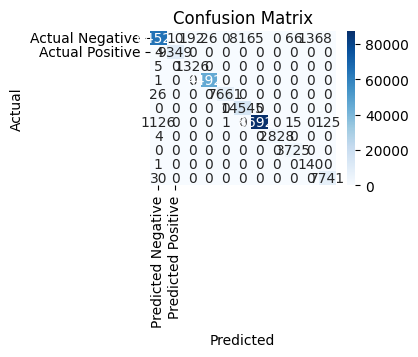

In [23]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
y_pred_random = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_random)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_random))
cm = confusion_matrix(y_test,y_pred_random )
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985128 entries, 1200487 to 121958
Data columns (total 77 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Src Port                    985128 non-null  int64  
 1   Dst Port                    985128 non-null  int64  
 2   Protocol                    985128 non-null  int64  
 3   Flow Duration               985128 non-null  int64  
 4   Total Fwd Packet            985128 non-null  int64  
 5   Total Bwd packets           985128 non-null  int64  
 6   Total Length of Fwd Packet  985128 non-null  float64
 7   Total Length of Bwd Packet  985128 non-null  float64
 8   Fwd Packet Length Max       985128 non-null  float64
 9   Fwd Packet Length Min       985128 non-null  float64
 10  Fwd Packet Length Mean      985128 non-null  float64
 11  Fwd Packet Length Std       985128 non-null  float64
 12  Bwd Packet Length Max       985128 non-null  float64
 13  Bwd Packet Le

After oversampling

In [30]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     65782
           2       1.00      1.00      1.00      9353
           3       1.00      1.00      1.00      1331
           4       1.00      1.00      1.00     44926
           5       1.00      1.00      1.00      7687
           6       1.00      1.00      1.00     14545
           7       1.00      1.00      1.00     88190
           8       1.00      1.00      1.00      2832
           9       1.00      1.00      1.00      3725
          10       0.94      0.89      0.91       141
          11       1.00      1.00      1.00      7771

    accuracy                           1.00    246283
   macro avg       0.99      0.99      0.99    246283
weighted avg       1.00      1.00      1.00    246283



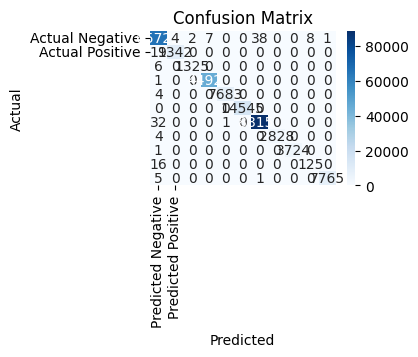

In [31]:
y_pred_random = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_random)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_random))
cm = confusion_matrix(y_test,y_pred_random )
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
print(X_train.columns.symmetric_difference(X_test.columns))  # Should be empty

Index([], dtype='object')


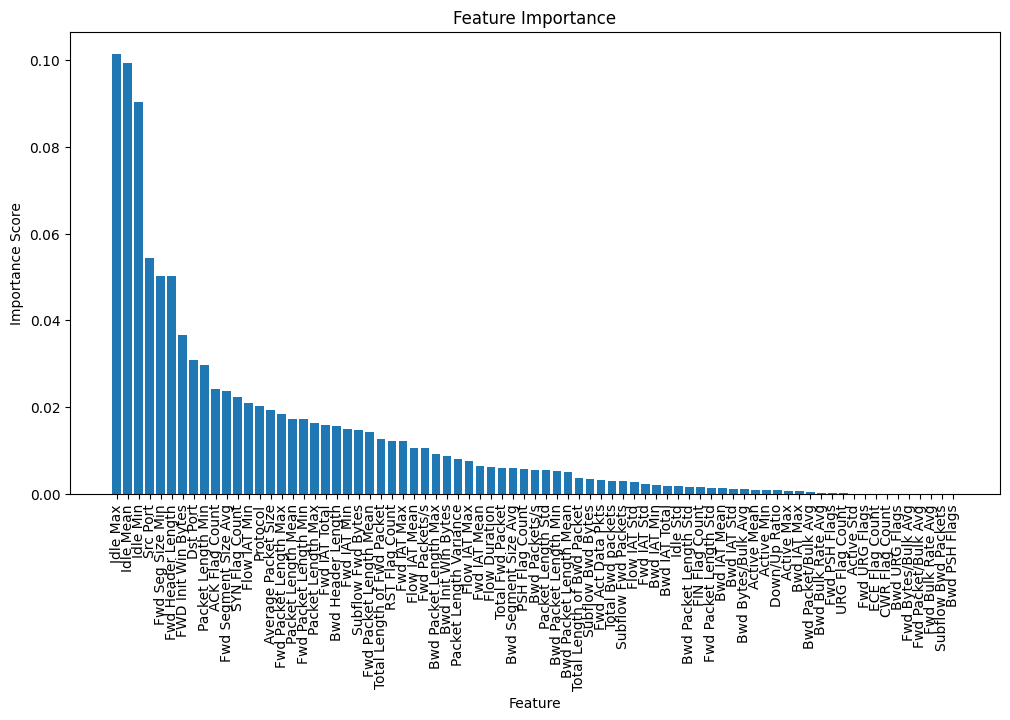

In [33]:
importances = model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")  # Use full length
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)  # Show all feature names
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()


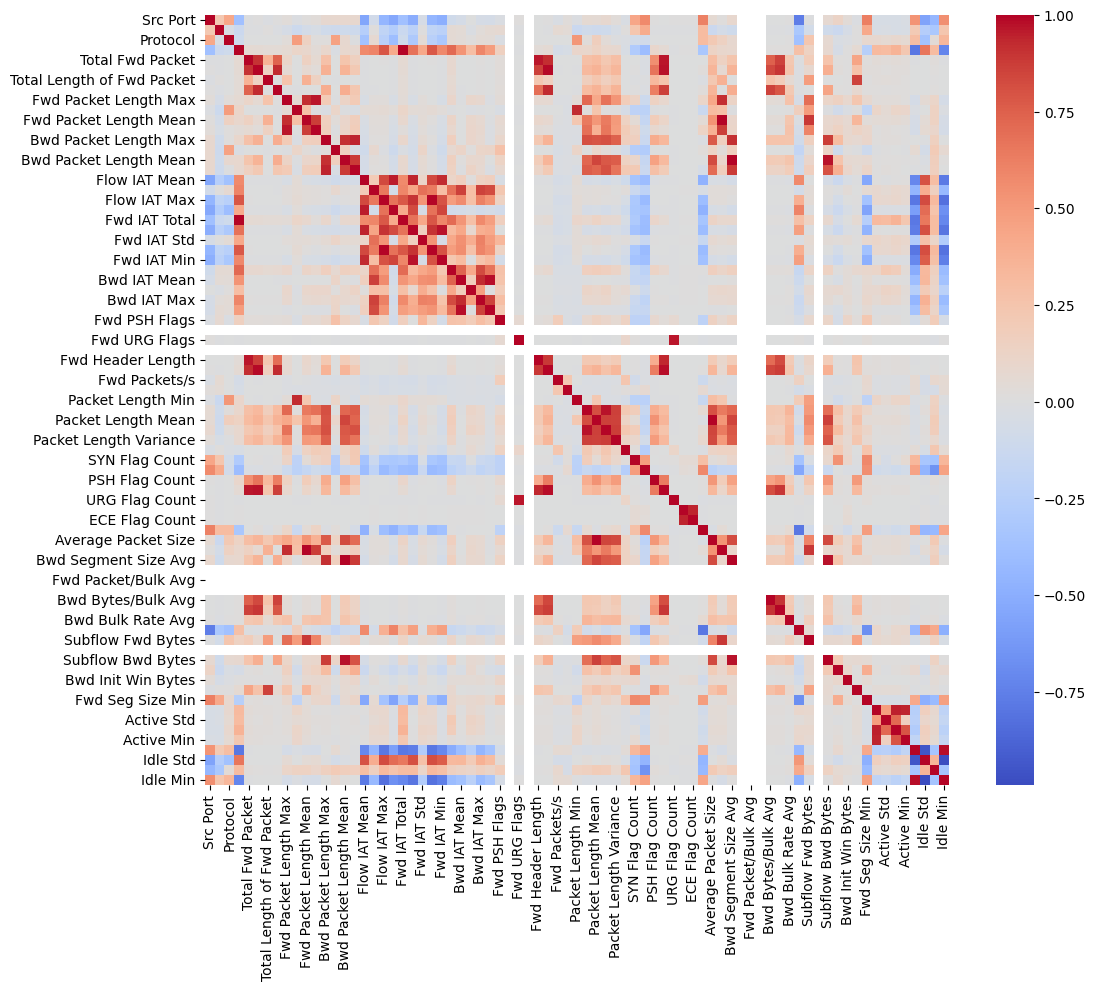

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.show()

In [35]:
print(X_train.columns.symmetric_difference(X_test.columns))

Index([], dtype='object')


In [36]:
import joblib
joblib.dump(clf, "iot_anomaly_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [37]:
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']